###                                                                                                                          Jaydeep Mahajan                                CE066-ML-LAB02

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,Imputer


In [11]:
car_data = pd.read_csv("D:/Mywork/ML/Datasets/CarData.csv"
,usecols=['Price','Age','KM','FuelType','HP','MetColor','Automatic','CC','Doors','Weight']
,na_values=['????','??'])
car_data.head(15)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105


### getting information

In [12]:

car_data.info()
car_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 112.3+ KB


,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [13]:
#removing rows of empty box values
car_data = car_data.drop(columns = ['Price'],axis=1)
car_data.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [14]:
car_data.dropna(axis=0,how='any',subset=['MetColor','FuelType','Age'],inplace=True)
car_data.head(15)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
8,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
10,25.0,31461.0,Petrol,192.0,0.0,0,1800,3,1185
11,22.0,43610.0,Petrol,192.0,0.0,0,1800,3,1185
12,25.0,32189.0,Petrol,192.0,0.0,0,1800,3,1185
13,31.0,23000.0,Petrol,192.0,1.0,0,1800,3,1185


In [17]:
hp_imputer = Imputer(missing_values = np.nan,strategy='mean')
hp_imputer = hp_imputer.fit(car_data.iloc[:,3:4].values)
car_data.iloc[:,3:4] = hp_imputer.transform(car_data.iloc[:,3:4].values)
km_imputer = Imputer(missing_values = np.nan,strategy='mean')
km_imputer = km_imputer.fit(car_data.iloc[:,1:2].values)
car_data.iloc[:,1:2] = km_imputer.transform(car_data.iloc[:,1:2].values)
car_data.head(15)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.000000,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.000000,1.0,0,2000,3,1165
3,26.0,48000.0,Diesel,90.000000,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.000000,0.0,0,2000,3,1170
5,32.0,61000.0,Diesel,90.000000,0.0,0,2000,3,1170
8,27.0,19700.0,Petrol,192.000000,0.0,0,1800,3,1185
10,25.0,31461.0,Petrol,192.000000,0.0,0,1800,3,1185
11,22.0,43610.0,Petrol,192.000000,0.0,0,1800,3,1185
12,25.0,32189.0,Petrol,192.000000,0.0,0,1800,3,1185
13,31.0,23000.0,Petrol,192.000000,1.0,0,1800,3,1185


In [18]:
#scale age
std_scale = MinMaxScaler()
age = car_data.iloc[:,0:1].values
car_data['Age']= std_scale.fit_transform(age)

#scale cc
std_scale = MinMaxScaler()
cc = car_data.iloc[:,6:7].values
car_data['CC']= std_scale.fit_transform(cc)

#scale weight
std_scale = MinMaxScaler()
weight = car_data.iloc[:,8:9].values
car_data['Weight']= std_scale.fit_transform(weight)

#scale km
std_scale = MinMaxScaler()
km = car_data.iloc[:,1:2].values
car_data['KM']= std_scale.fit_transform(km)

#scale hp
std_scale = MinMaxScaler()
hp = car_data.iloc[:,3:4].values
car_data['HP']= std_scale.fit_transform(hp)
car_data.head()


E:\Jupyter\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Jupyter\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.278481,0.193355,Diesel,0.170732,1.0,0,1.0,three,0.268293
1,0.278481,0.300149,Diesel,0.170732,1.0,0,1.0,3,0.268293
3,0.316456,0.197528,Diesel,0.170732,0.0,0,1.0,3,0.268293
4,0.367089,0.158433,Diesel,0.170732,0.0,0,1.0,3,0.276423
5,0.392405,0.251026,Diesel,0.170732,0.0,0,1.0,3,0.276423


In [19]:
car_data.describe()

,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.690962,0.285123,0.266165,0.675068,0.053105,0.384948,0.120114
std,0.238344,0.155902,0.122004,0.468561,0.224344,0.265622,0.085546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531646,0.179935,0.170732,0.000000,0.000000,0.142857,0.073171
50%,0.746835,0.262882,0.333333,1.000000,0.000000,0.428571,0.113821
75%,0.873418,0.360897,0.333333,1.000000,0.000000,0.428571,0.146341
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handel Doors columns

In [20]:


car_data['Doors'] = car_data['Doors'].replace('three',3)
car_data['Doors'] = car_data['Doors'].replace('four',4)
car_data['Doors'] = car_data['Doors'].replace('five',5)
car_data.head(5)



,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.278481,0.193355,Diesel,0.170732,1.0,0,1.0,3,0.268293
1,0.278481,0.300149,Diesel,0.170732,1.0,0,1.0,3,0.268293
3,0.316456,0.197528,Diesel,0.170732,0.0,0,1.0,3,0.268293
4,0.367089,0.158433,Diesel,0.170732,0.0,0,1.0,3,0.276423
5,0.392405,0.251026,Diesel,0.170732,0.0,0,1.0,3,0.276423


In [21]:
car_data['Doors'] = car_data['Doors'].astype(int)
car_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 9 columns):
Age          1111 non-null float64
KM           1111 non-null float64
FuelType     1111 non-null object
HP           1111 non-null float64
MetColor     1111 non-null float64
Automatic    1111 non-null int64
CC           1111 non-null float64
Doors        1111 non-null int32
Weight       1111 non-null float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 82.5+ KB


### Feature selction step

In [26]:

corr_mat = car_data.corr()
corr_mat


,CNG,Diesel,Petrol,Age,KM,HP,MetColor,Automatic,CC,Doors
CNG,1.000000,-0.036362,-0.284575,0.012015,0.160851,0.057554,-0.001874,-0.024746,0.017075,0.011340
Diesel,-0.036362,1.000000,-0.947672,-0.057519,0.437573,-0.533161,-0.024817,-0.082408,0.765078,0.037765
Petrol,-0.284575,-0.947672,1.000000,0.051339,-0.471143,0.493069,0.024405,0.086959,-0.739386,-0.039851
Age,0.012015,-0.057519,0.051339,1.000000,0.520458,-0.166037,-0.108185,0.031442,-0.092548,-0.172241
KM,0.160851,0.437573,-0.471143,0.520458,1.000000,-0.366112,-0.105365,-0.054317,0.316058,-0.078913
HP,0.057554,-0.533161,0.493069,-0.166037,-0.366112,1.000000,0.065443,0.019653,0.038990,0.064210
MetColor,-0.001874,-0.024817,0.024405,-0.108185,-0.105365,0.065443,1.000000,-0.007105,0.015111,0.098079
Automatic,-0.024746,-0.082408,0.086959,0.031442,-0.054317,0.019653,-0.007105,1.000000,-0.058839,0.001188
CC,0.017075,0.765078,-0.739386,-0.092548,0.316058,0.038990,0.015111,-0.058839,1.000000,0.119031
Doors,0.011340,0.037765,-0.039851,-0.172241,-0.078913,0.064210,0.098079,0.001188,0.119031,1.000000


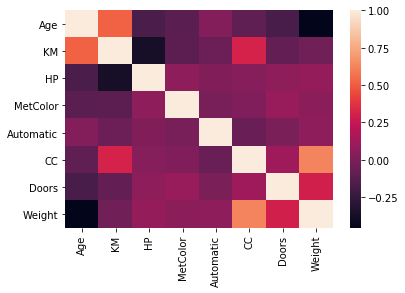

In [23]:
sns.heatmap(corr_mat)

In [24]:
columns = np.full((corr_mat.shape[0],), True, dtype=bool)
for i in range(corr_mat.shape[0]):
     for j in range(i+1, corr_mat.shape[0]):
             if corr_mat.iloc[i,j] >= 0.6:
                     if columns[j]:
                             columns[j] = False

### handel FuelType column(represent in one hot coding) and remove weigth column

In [25]:
dummy_fueltype = pd.get_dummies(car_data['FuelType'])
car_data = car_data.drop('FuelType',axis=1)
selected_columns = car_data.columns[columns]
car_data = pd.concat([dummy_fueltype,car_data[selected_columns]],axis=1)
car_data.head(10)

,CNG,Diesel,Petrol,Age,KM,HP,MetColor,Automatic,CC,Doors
0,0,1,0,0.278481,0.193355,0.170732,1.0,0,1.000000,3
1,0,1,0,0.278481,0.300149,0.170732,1.0,0,1.000000,3
3,0,1,0,0.316456,0.197528,0.170732,0.0,0,1.000000,3
4,0,1,0,0.367089,0.158433,0.170732,0.0,0,1.000000,3
5,0,1,0,0.392405,0.251026,0.170732,0.0,0,1.000000,3
8,0,0,1,0.329114,0.081066,1.000000,0.0,0,0.714286,3
10,0,0,1,0.303797,0.129466,1.000000,0.0,0,0.714286,3
11,0,0,1,0.265823,0.179462,1.000000,0.0,0,0.714286,3
12,0,0,1,0.303797,0.132461,1.000000,0.0,0,0.714286,3
13,0,0,1,0.379747,0.094646,1.000000,1.0,0,0.714286,3
